In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


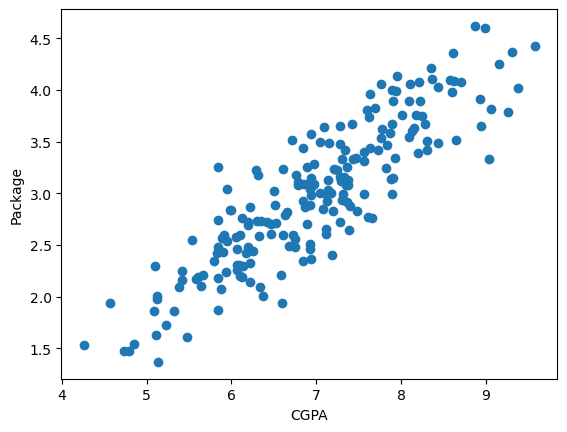

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [4]:
X=df.iloc[:,0:1]
y=df.iloc[:,1:2]

In [5]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\Shahid\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.89111601]])

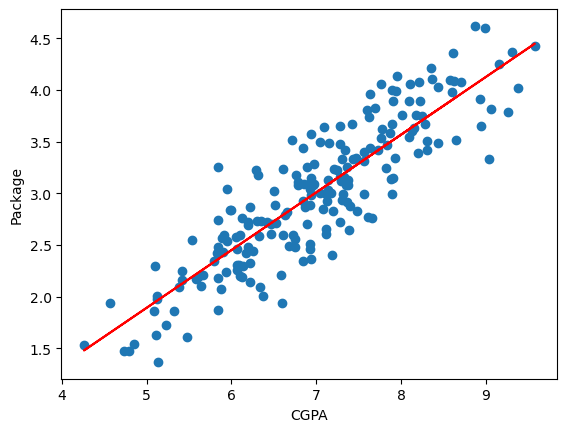

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [16]:
m=lr.coef_
m

array([[0.55795197]])

In [17]:
b=lr.intercept_
b

array([-0.89611192])

### user defined logic

In [18]:
class  MeraLR:
    def _init_(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
          num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
          den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m = num/den 
        self.b= y_train.mean()-(self.m*X_train.mean())
        print(self.m)
        print(self.b)
    def predict(self , X_test):
        return self.m*X_test+self.b
    

In [19]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [20]:
X=df['cgpa'].values
y=df['package'].values

In [21]:
print(X)
print()
print(y)

[6.89 5.12 7.82 7.42 6.94 7.89 6.73 6.75 6.09 8.31 5.32 6.61 8.94 6.93
 7.73 7.25 6.84 5.38 6.94 7.48 7.28 6.85 6.14 6.19 6.53 7.28 8.31 5.42
 5.94 7.15 7.36 8.1  6.96 6.35 7.34 6.87 5.99 5.9  8.62 7.43 9.38 6.89
 5.95 7.66 5.09 7.87 6.07 5.84 8.63 8.87 9.58 9.26 8.37 6.47 6.86 8.2
 5.84 6.6  6.92 7.56 5.61 5.48 6.34 9.16 7.36 7.6  5.11 6.51 7.56 7.3
 5.79 7.47 7.78 8.44 6.85 6.97 6.94 8.99 6.59 7.18 7.63 6.1  5.58 8.44
 4.26 4.79 7.61 8.09 4.73 6.42 7.11 6.22 7.9  6.79 5.83 6.63 7.11 5.98
 7.69 6.61 7.95 6.71 5.13 7.05 7.62 6.66 6.13 6.33 7.76 7.77 8.18 5.42
 8.58 6.94 5.84 8.35 9.04 7.12 7.4  7.39 5.23 6.5  5.12 5.1  6.06 7.33
 5.91 6.78 7.93 7.29 6.68 6.37 5.84 6.05 7.2  6.1  5.64 7.14 7.91 7.19
 7.91 6.76 6.93 4.85 6.17 5.84 6.07 5.66 7.57 8.28 6.3  6.12 7.37 7.94
 7.08 6.98 7.38 6.47 5.95 8.71 7.13 7.3  5.53 8.93 9.06 8.21 8.6  8.13
 8.65 9.31 6.22 8.01 6.93 6.75 7.32 7.04 6.29 7.09 8.15 7.14 6.19 8.22
 5.88 7.28 7.88 6.31 7.84 6.26 7.35 8.11 6.19 7.28 8.25 4.57 7.89 6.93
 5.89 7.

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train.shape

(160,)

In [24]:
lr=MeraLR()

In [25]:
lr.fit(X_train, y_train)

0.5579519734250721
-0.8961119222429152


In [26]:
X_test[0]

8.58

In [27]:
print(lr.predict(X_test[0]))

3.891116009744203


### Mean Absoulte Error

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
y_pred=lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [30]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [31]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878174


### Mean Square Error

In [32]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495523


### Root Mean Square Error

In [33]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.3482705171773161


### R2 Score

In [34]:
print('R2 Score',r2_score(y_test,y_pred))

R2 Score 0.7807301475103842


### adjusted R2 score

In [35]:
print('R2 Score',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)
r2

R2 Score 0.7807301475103842


0.7807301475103842

In [36]:
X_test.shape

(40,)

In [37]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343417